# Backtesting investment strategies

## Setup

In [1]:
from ml_strategies.random_forest import strategy as random_forest_strategy
from quant_strategies.minimum_variance_portfolio import strategy as minimum_variance_portfolio_strategy 
import cloudpickle
import backtester
import helpers
import sys

## Data download

In [2]:
equity_symbols = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "^GSPC"]

equity_returns = helpers.download_equity_returns(equity_symbols, days=365 * 5)
stock_returns = equity_returns.drop('^GSPC', axis=1)
index_returns = equity_returns.loc[:, ['^GSPC']]
sample_split_index = len(equity_returns) // 2

## Stock returns

In [3]:
helpers.display_as_percentage(stock_returns)

,AAPL,MSFT,GOOGL,AMZN,TSLA
2018-11-14,-2.82 %,-1.42 %,0.63 %,-1.97 %,1.56 %
2018-11-15,2.47 %,2.2 %,1.56 %,1.28 %,1.29 %
2018-11-16,1.11 %,0.94 %,-0.26 %,-1.61 %,1.68 %
2018-11-19,-3.96 %,-3.39 %,-3.82 %,-5.09 %,-0.24 %
2018-11-20,-4.78 %,-2.78 %,0.29 %,-1.11 %,-1.69 %
...,...,...,...,...,...
2023-11-06,1.46 %,1.06 %,0.89 %,0.82 %,-0.31 %
2023-11-07,1.45 %,1.12 %,0.55 %,2.13 %,1.33 %
2023-11-08,0.59 %,0.74 %,0.66 %,-0.44 %,-0.03 %
2023-11-09,-0.26 %,-0.69 %,-1.21 %,-1.04 %,-5.46 %


## Quant strategy example

In [4]:
test_data = stock_returns[sample_split_index:]

report = backtester.run(minimum_variance_portfolio_strategy, test_data, test_data)

### Portfolio metrics

In [5]:
report.portfolio_metrics()

,Metric
Portfolio return,42.79
Portfolio volatility,26.68
Sharpe ratio,1.42


### Portfolio weights

In [6]:
helpers.display_as_percentage(report.portfolio_weights)

,AAPL,MSFT,GOOGL,AMZN,TSLA
2021-05-18,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2021-05-19,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2021-05-20,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2021-05-21,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2021-05-24,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
...,...,...,...,...,...
2023-11-06,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2023-11-07,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2023-11-08,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %
2023-11-09,46.43 %,36.22 %,7.35 %,5.0 %,5.0 %


### Portfolio returns

#### Table

In [7]:
helpers.display_as_percentage(report.portfolio_returns)

,Minimum Variance Portfolio portfolio returns
2021-05-18,-0.87 %
2021-05-19,-0.97 %
2021-05-20,-0.07 %
2021-05-21,1.82 %
2021-05-24,-1.04 %
...,...
2023-11-06,0.37 %
2023-11-07,1.15 %
2023-11-08,1.29 %
2023-11-09,0.57 %


#### Graph

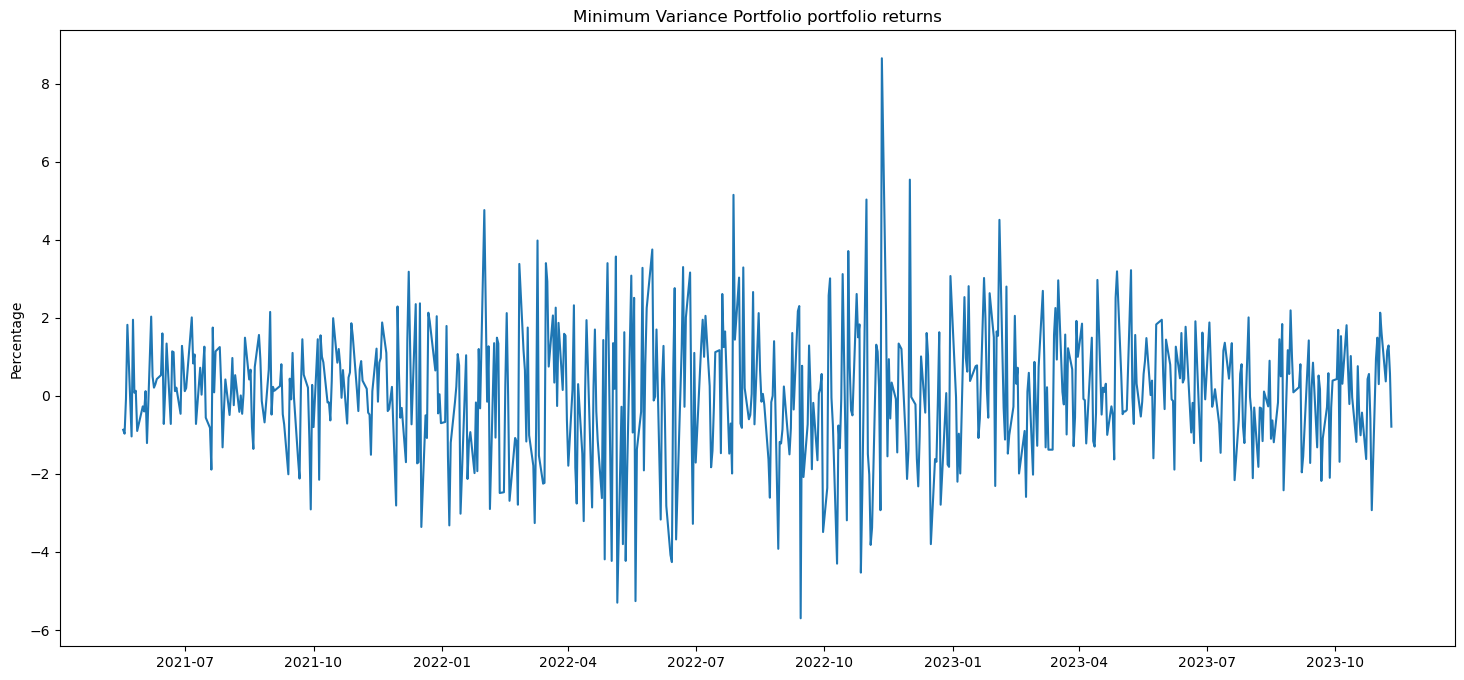

In [8]:
report.plot_portfolio_returns()

### Portfolio value

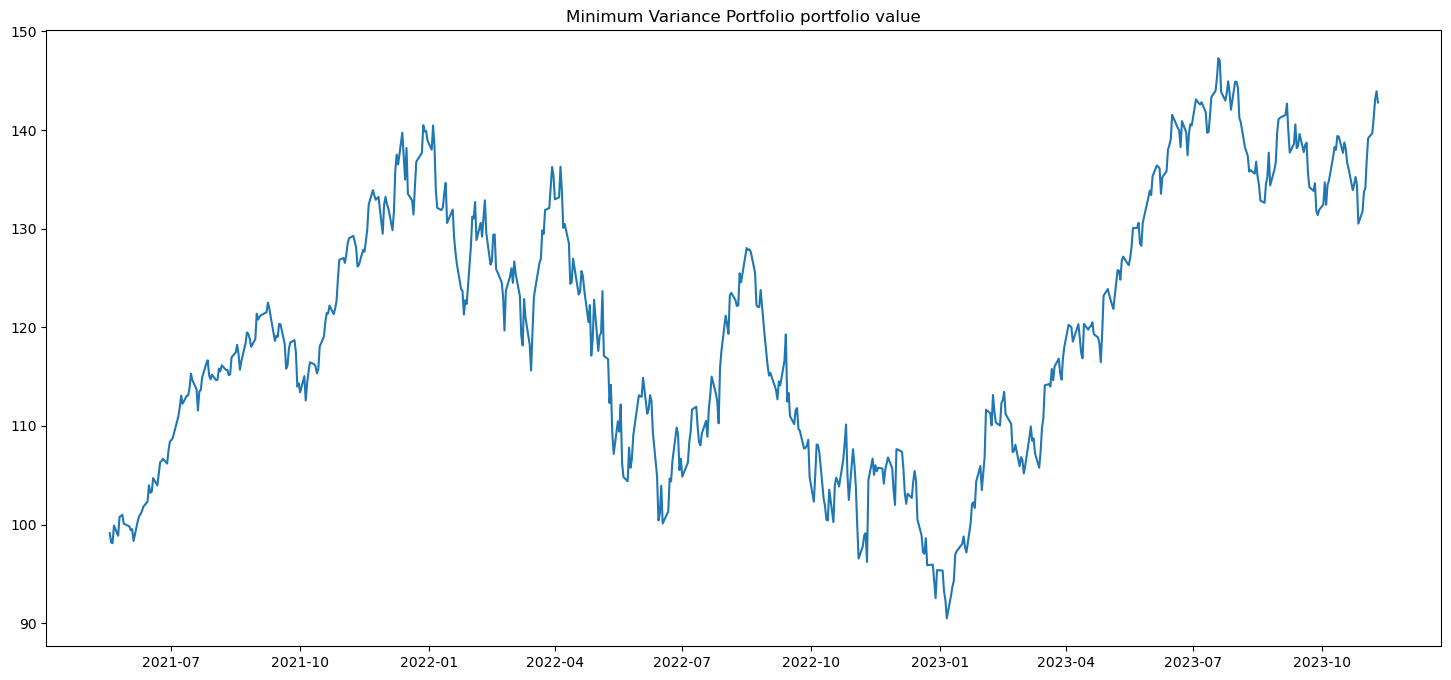

In [9]:
report.plot_portfolio_value()

### Portfolio value breakdown

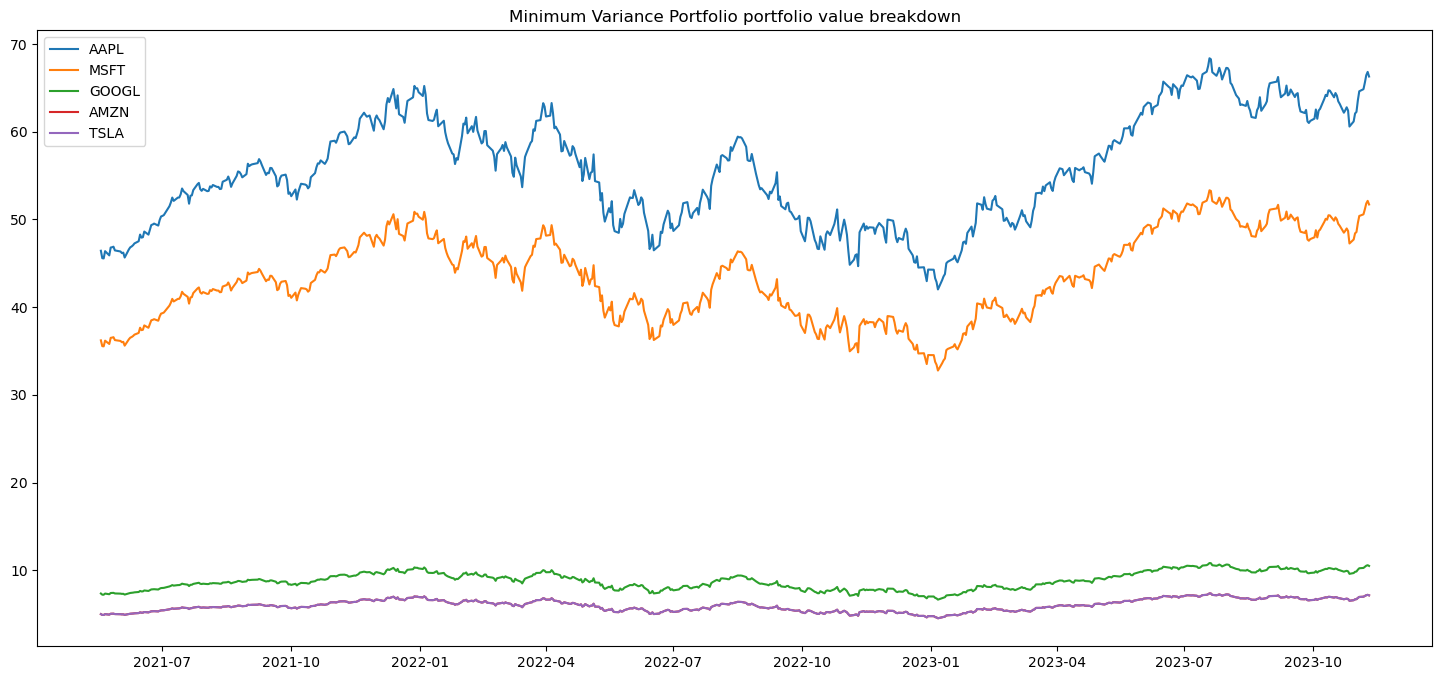

In [10]:
report.plot_portfolio_value_breakdown()

## Machine learning strategy example

In [11]:
y_training_data = stock_returns[:sample_split_index]
X_training_data = index_returns[:sample_split_index]
X_test_data = index_returns[sample_split_index:]
stock_test_data = stock_returns[sample_split_index:]

random_forest_strategy.train(y=y_training_data, X=X_training_data)
random_forest_strategy.dump()

report = backtester.run(random_forest_strategy, X_test_data, stock_test_data)

### Portfolio metrics

In [12]:
report.portfolio_metrics()

,Metric
Portfolio return,47.10
Portfolio volatility,34.47
Sharpe ratio,1.22


### Portfolio weights

In [13]:
helpers.display_as_percentage(report.portfolio_weights)

,AAPL,MSFT,GOOGL,AMZN,TSLA
2021-05-18,15.3 %,15.3 %,15.3 %,15.3 %,38.8 %
2021-05-19,15.04 %,15.04 %,15.04 %,15.98 %,38.9 %
2021-05-20,14.57 %,19.17 %,16.61 %,37.45 %,12.21 %
2021-05-21,23.93 %,11.53 %,11.53 %,11.53 %,41.48 %
2021-05-24,14.37 %,20.43 %,26.91 %,23.91 %,14.37 %
...,...,...,...,...,...
2023-11-06,14.98 %,34.93 %,14.98 %,20.12 %,14.98 %
2023-11-07,32.08 %,15.61 %,27.56 %,12.37 %,12.37 %
2023-11-08,5.09 %,14.31 %,70.41 %,5.09 %,5.09 %
2023-11-09,17.45 %,16.85 %,16.85 %,17.94 %,30.9 %


### Portfolio returns

#### Table

In [14]:
helpers.display_as_percentage(report.portfolio_returns)

,Random Forest portfolio returns
2021-05-18,-0.88 %
2021-05-19,-0.59 %
2021-05-20,-0.21 %
2021-05-21,2.62 %
2021-05-24,-0.94 %
...,...
2023-11-06,0.74 %
2023-11-07,0.94 %
2023-11-08,0.8 %
2023-11-09,0.25 %


#### Graph

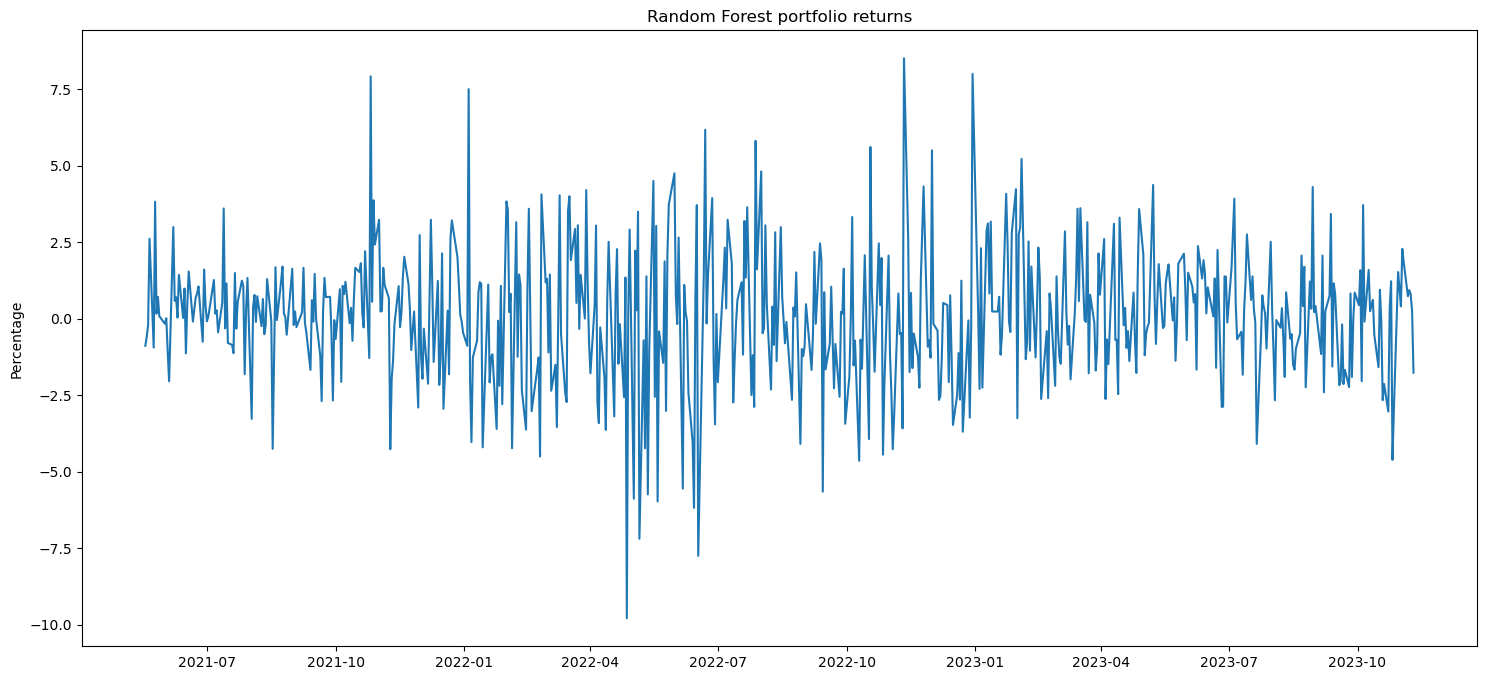

In [15]:
report.plot_portfolio_returns()

### Portfolio value

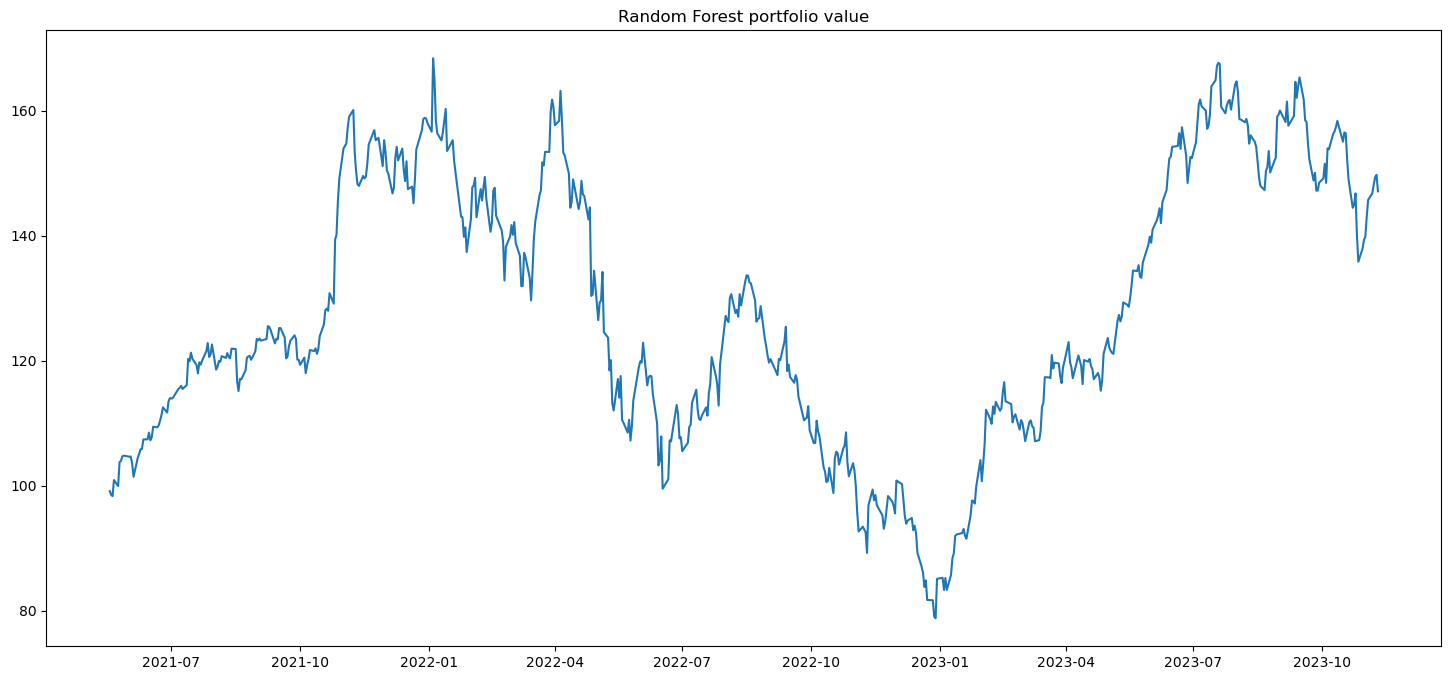

In [16]:
report.plot_portfolio_value()

### Portfolio value breakdown

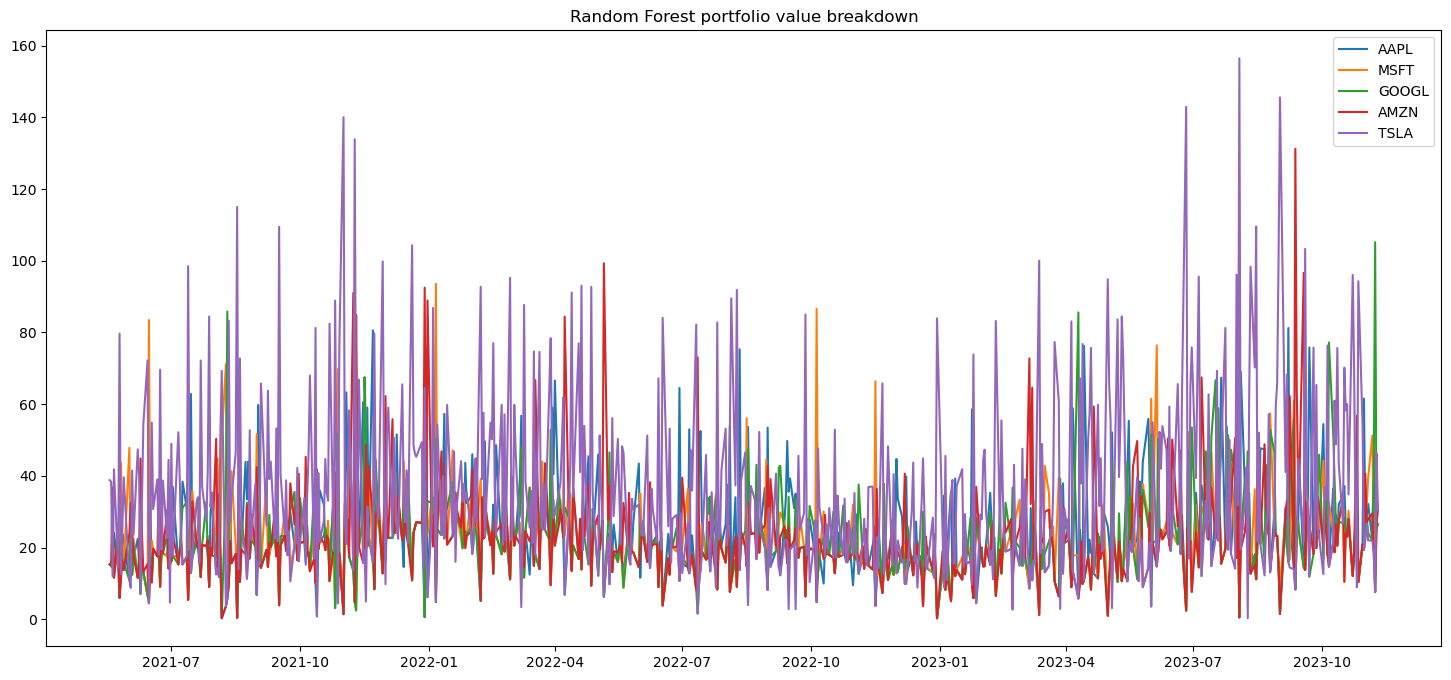

In [17]:
report.plot_portfolio_value_breakdown()